# Demo 3D to 2D projection with separated samples Gromov-Wasserstein

In [1]:
import sys
sys.path.append('C:/Users/Erwan/Desktop/Stage_2A/Gromov-Wasserstein/codes/gw')
import gromov
import loss
import mapping
import scipy as sp
import numpy as np
import ot
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D

# Data definition

Source data is a 3 dimensionnal vector

In [2]:
n=20
mu1=np.array([8,8,8])
cov1=np.array([[1,0,0],[0,1,0],[0,0,1]])

mu2=np.array([1,1,1])
cov2=np.array([[1,0,0],[0,1,0],[0,0,1]])

P1=sp.linalg.sqrtm(cov1)
xs1= np.random.randn(10,3).dot(P1)+mu1
P2=sp.linalg.sqrtm(cov2)
xs2= np.random.randn(10,3).dot(P2)+mu2
xs=np.concatenate((xs1,xs2))

Target data is the 2D projection of source data

In [3]:
xt=[[xs[i][0],xs[i][1]] for i in range(len(xs))]
xt=np.asarray(xs)

Distribution generation :

In [5]:
p=ot.unif(n)
p=p.reshape(1,len(p)).T
q=ot.unif(n)
q=q.reshape(1,len(q)).T

Cost matrix generation :

In [6]:
C1=sp.spatial.distance.cdist(xs,xs)

C2=sp.spatial.distance.cdist(xt,xt)

C1/=C1.max()
C2/=C2.max()

# Plot dataset

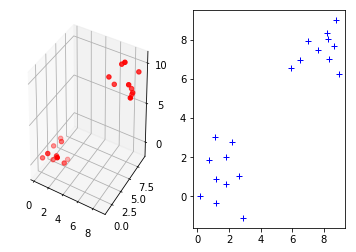

In [7]:
fig=pl.figure()

ax1=fig.add_subplot(121,projection='3d')

ax1.scatter(xs[:,0],xs[:,1],xs[:,2],color='r')

ax2=fig.add_subplot(122)

ax2.plot(xt[:,0],xt[:,1],'+b',label='Source samples')

pl.show()

# Plot cost matrices

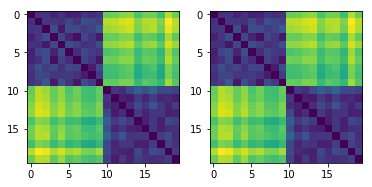

In [8]:
pl.subplot(121)

pl.imshow(C2)

pl.subplot(122)

pl.imshow(C1)

pl.show()

# Solve Gromov-Wasserstein

In [9]:
gw=gromov.gromov_wasserstein(C1,C2,p,q,'square_loss',5e-4)

# GW Matrix plot

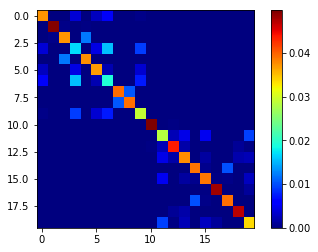

In [10]:
pl.imshow(gw,cmap='jet')
pl.colorbar()
pl.show()